# 5Ïû•. ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†

> 5.1. ÏÑ†Ìòï SVM Î∂ÑÎ•ò \
> 5.2. ÎπÑÏÑ†Ìòï SVM Î∂ÑÎ•ò \
> 5.3. SVM ÌöåÍ∑Ä \
> 5.4. SVM Ïù¥Î°† \
> 5.5. ÏåçÎåÄ Î¨∏Ï†ú

## ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã† (Support Vector Machine)

- **Î∂ÑÎ•ò**, ÌöåÍ∑Ä, ÌäπÏù¥Ïπò ÌÉêÏßÄÏóê ÏÇ¨Ïö©ÌïòÎäî Îã§Î™©Ï†Å Î®∏Ïã†Îü¨Îãù Î™®Îç∏ (ÏßÄÎèÑÌïôÏäµ)
- ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ : ÌÅ¥ÎûòÏä§ Í≤ΩÍ≥ÑÏóê ÏúÑÏπòÌïú ÏÉòÌîåÎ°ú Í≤∞Ï†ï Í≤ΩÍ≥Ñ*hyperplane)Î•º Íµ¨Î∂ÑÌïòÎäîÎç∞ Ï§ëÏöî
- ÎßàÏßÑÏù¥ ÌÅ∞ Î∞©Ìñ•ÏúºÎ°ú ÌïôÏäµ -> ÎùºÏßÄ ÎßàÏßÑ Î∂ÑÎ•ò(Large Margin Classification)

## ÏÑ§Ï†ï

In [6]:
import sys

assert sys.version_info >= (3, 7)

In [7]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [9]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 5.1 ÏÑ†Ìòï SVM Î∂ÑÎ•ò

Í∑∏Î¶º 5-1. ÎùºÏßÄ ÎßàÏßÑ Î∂ÑÎ•ò

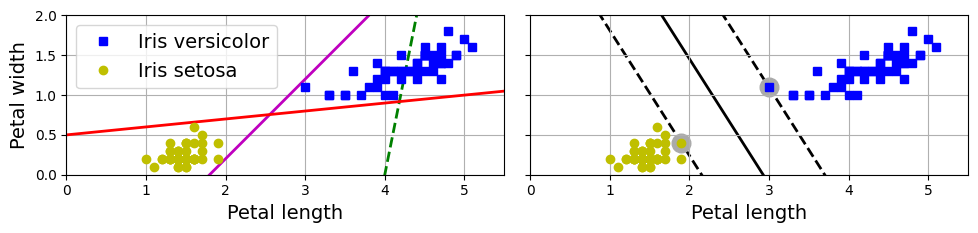

In [10]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-1ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Î∂ÑÎ•ò Î™®Îç∏
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(X, y)

# ÎÇòÏÅú Î™®Îç∏
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Í≤∞Ï†ï Í≤ΩÍ≥ÑÏóêÏÑú, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

- 4Ïû•ÏóêÏÑú Îã§Î£®ÏóàÎçò Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞

- ÏôºÏ™Ω Í∑∏ÎûòÌîÑ
1. ÏÑ∏ Í∞úÏùò ÏÑ†Ìòï Î∂ÑÎ•òÍ∏∞Î•º Ïù¥Ïö© (Ïó¨Í∏∞ÏÑúÎäî ÏûÑÏùòÏùò ÏÑ†)
2. Ï¥àÎ°ù Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎäî Ï†ÅÏ†àÌïú Î∂ÑÎ•òÎ•º Î™ªÌïòÍ≥† ÏûàÏùå
3. ÎÇòÎ®∏ÏßÄ Îëê Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎäî Î∂ÑÎ•òÎ•º ÏûòÌïòÍ≥† ÏûàÏúºÎÇò ÏÉòÌîåÏóê ÎÑàÎ¨¥ Í∞ÄÍπåÏõÄ -> unseen dataÏóê ÎåÄÌï¥ Î∂ÑÎ•òÎ•º Ïûò Î™ªÌï† ÏàòÎèÑ ÏûàÏùå

- Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ
1. SVM Î∂ÑÎ•òÍ∏∞Î•º Ïù¥Ïö©
2. Í≤∞Ï†ïÍ≤ΩÍ≥Ñ(Ïã§ÏÑ†)Í∞Ä Î∂ÑÎ•òÎ•º ÌïòÍ≥† ÏûàÏùå
3. Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÏÉòÌîåÎ°úÎ∂ÄÌÑ∞ Í∞ÄÎä•Ìïú Î©ÄÎ¶¨ Îñ®Ïñ¥Ï†∏ ÏûàÏùå (ÎùºÏßÄ ÎßàÏßÑ Î∂ÑÎ•ò)
4. ÎßàÏßÑ Í≤ΩÍ≥ÑÏÑ†(Ï†êÏÑ†)Ïóê ÏúÑÏπòÌïú ÏÉòÌîåÏùÑ ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ÎùºÍ≥† Î∂ÄÎ¶Ñ
5. ÎßàÏßÑ Î∞ñÏóê ÌõàÎ†® ÏÉòÌîåÏù¥ Ï∂îÍ∞ÄÎêòÏñ¥ÎèÑ Í≤∞Ï†ï Í≤ΩÍ≥ÑÏóêÎäî ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏùå

> DMZ Í∑∏Î¶¨Í∏∞ Í∞ôÏùÄ ÎäêÎÇå \
> Í≤∞Ï†ïÍ≤ΩÍ≥Ñ(hyperplane, Ï¥àÌèâÎ©¥)ÏóêÏÑú Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ÍπåÏßÄÏùò Í±∞Î¶¨Î•º ÎßàÏßÑÏù¥ÎùºÍ≥† Ìï® : Îëê Í±∞Î¶¨Î•º Ìï©Ïπú Í≤ÉÏùÑ ÎßàÏßÑÏù¥ÎùºÍ≥† ÌïòÍ∏∞ÎèÑ Ìï® \
> Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÎßàÏßÑÌÅ¨Í∏∞Îäî Í∞ôÏùå

> - ÏùºÎ∞ò ÏÑ†Ìòï Î∂ÑÎ•ò: ÏùºÎ∞òÏ†ÅÏù∏ ÏÑ†Ìòï Î∂ÑÎ•ò Î™®Îç∏(Ïòà: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)ÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Î∂ÑÌïòÎäî **ÌïòÎÇòÏùò Í≤∞Ï†ï Í≤ΩÍ≥Ñ(ÏßÅÏÑ†Ïù¥ÎÇò Ï¥àÌèâÎ©¥)**Î•º ÏÑ§Ï†ï, Ïù¥ Í≤∞Ï†ï Í≤ΩÍ≥ÑÎäî Î≥¥ÌÜµ Ïò§Î•òÎ•º ÏµúÏÜåÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÏÑ§Ï†ï \
> - SVM Î∂ÑÎ•ò: SVMÏùÄ Í≤∞Ï†ï Í≤ΩÍ≥ÑÎøêÎßå ÏïÑÎãàÎùº, ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ÎùºÍ≥† Î∂àÎ¶¨Îäî Îëê ÌÅ¥ÎûòÏä§Ïùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏÉòÌîåÎì§ ÏÇ¨Ïù¥Ïùò ÏµúÎåÄ ÎßàÏßÑÏùÑ Ï∞æÎäî Î∞©ÏãùÏúºÎ°ú Í≤ΩÍ≥ÑÎ•º ÏÑ§Ï†ï, SVMÏùÄ ÌÅ¥ÎûòÏä§ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÏµúÎåÄÌôîÌïòÎäî ÏµúÏ†ÅÏùò Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ•º Ï∞æÏïÑÎÇ¥Îäî Îç∞ Ï¥àÏ†ê

Í∑∏Î¶º 5-2 ÌäπÏÑ± Ïä§ÏºÄÏùºÏóê Îî∞Î•∏ ÎØºÍ∞êÏÑ±

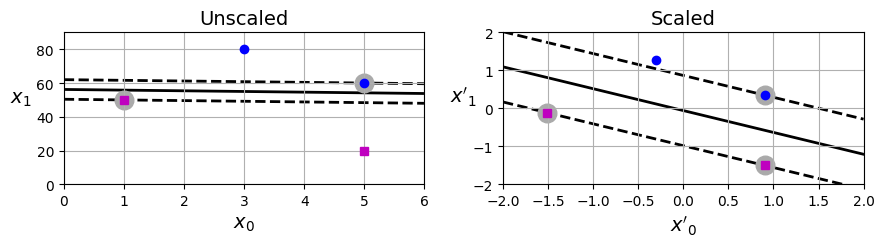

In [11]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-2Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$¬†¬†¬†¬†", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

SVMÏùÄ ÌäπÏÑ±Ïùò Ïä§ÏºÄÏùºÏóê ÎØºÍ∞êÌï®
> ÏÉòÌîå Í∞Ñ Í±∞Î¶¨Î•º Í∏∞Î∞òÏúºÎ°ú ÎèôÏûëÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, ÌäπÏÑ±Ïùò Í∞íÏù¥ ÌÅ¨Î©¥ ÌÅ∞ ÎåÄÎ°ú, ÏûëÏúºÎ©¥ ÏûëÏùÄ ÎåÄÎ°ú ÏòÅÌñ•ÏùÑ Î∞õÏïÑ Ïä§ÏºÄÏùºÏù¥ Ï§ëÏöîÌï¥Ïßê.
>> Í∞íÏù¥ ÌÅ¨Î©¥ Î™®Îç∏Ïóê Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÍ≥†, ÏûëÏúºÎ©¥ Î¨¥ÏãúÎê†ÏàòÎèÑ ÏûàÏùå.. Í∑∏ÎûòÏÑú Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöîÌï®

### 5.1.1 ÏÜåÌîÑÌä∏ ÎßàÏßÑ Î∂ÑÎ•ò

Í∑∏Î¶º 5-3 Ïù¥ÏÉÅÏπòÏóê ÎØºÍ∞êÌïú ÌïòÎìú ÎßàÏßÑ

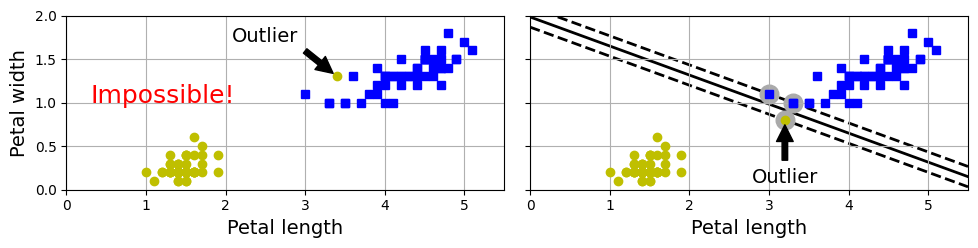

In [12]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-3ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

ÌïòÎìú ÎßàÏßÑ Î∂ÑÎ•ò
- Î™®Îì† ÏÉòÌîåÏù¥ Í≤∞Ï†ï Í≤ΩÍ≥ÑÏôÄ ÎßàÏßÑ Î∞îÍπ•Ï™ΩÏóê Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÎê®, Ïò§Î•òÍ∞Ä ÌóàÏö©ÎêòÏßÄ ÏïäÏùå
- Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂ÑÎêòÏñ¥Ïïº Ìï®
- Ïù¥ÏÉÅÏπòÏóê ÎØºÍ∞ê -> Îç∞Ïù¥ÌÑ∞Ïóê Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏúºÎ©¥ Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä ÏôúÍ≥°Îê† Ïàò ÏûàÏùå
-- ÏÑ†ÌòïÎ∂ÑÎ•òÍ∞Ä Î∂àÍ∞ÄÎä•ÌïòÍ±∞ÎÇò ÏùºÎ∞òÌôîÍ∞Ä Ïñ¥Î†§ÏõÄ

--> Ï¢Ä Îçî Ïú†Ïó∞Ìïú Î™®Îç∏Ïù¥ ÌïÑÏöîÌï®

ÏÜåÌîÑÌä∏ ÎßàÏßÑ Î∂ÑÎ•ò
- ÎßàÏßÑ Ïò§Î•òÎ•º ÌóàÏö©ÌïòÎ©¥ÏÑú Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÎèÑÎ°úÏùò Ìè≠ÏùÑ ÏµúÎåÄÎ°ú ÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú Ïú†ÎèÑ
- ÎßàÏßÑ Ïò§Î•ò : ÏÉòÌîåÏù¥ ÎßàÏßÑ Ï§ëÍ∞ÑÏù¥ÎÇò Î∞òÎåÄ ÌÅ¥ÎûòÏä§Ï™ΩÏóê ÏûàÎäî Í≤ΩÏö∞
- `C` : SVM Í∑úÏ†ú ÌååÎùºÎØ∏ÌÑ∞
-- CÎ•º Ï§ÑÏù¥Î©¥ ÎßàÏßÑÏù¥ Ïª§ÏßÄÍ≥† ÌõàÎ†®ÏóêÎü¨ ÌóàÏö©ÏùÑ ÎßéÏù¥ Ìï® -> underfit Í∞ÄÎä•
-- CÎ•º ÎäòÎ¶¨Î©¥ ÎßàÏßÑÏù¥ Ï§ÑÏñ¥Îì§Í≥† ÌõàÎ†®ÏóêÎü¨ ÌóàÏö©ÏùÑ Ï†ÅÍ≤å Ìï® -> overfit Í∞ÄÎä•


In [13]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris-Virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

Í∑∏Î¶º 5.4 ÎÑìÏùÄ ÎßàÏßÑ(ÏôºÏ™Ω) vs. Ï†ÅÏùÄ ÎßàÏßÑ Ïò§Î•ò(Ïò§Î•∏Ï™Ω)

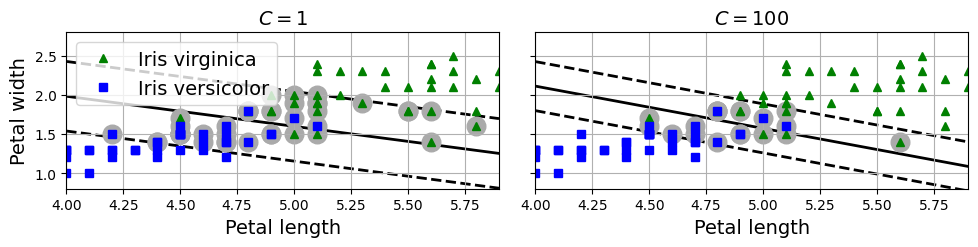

In [14]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-4Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÌååÎùºÎØ∏ÌÑ∞Î°ú Î≥ÄÌôò
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Ï∞æÍ∏∞(LinearSVCÎäî Ïù¥ ÏûëÏóÖÏùÑ ÏûêÎèôÏúºÎ°ú ÏàòÌñâÌïòÏßÄ ÏïäÏùå)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

> ÏúÑÏóêÏÑúÎäî C=100Ïù¥ Îçî ÏùºÎ∞òÌôîÍ∞Ä ÏûòÎê®

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


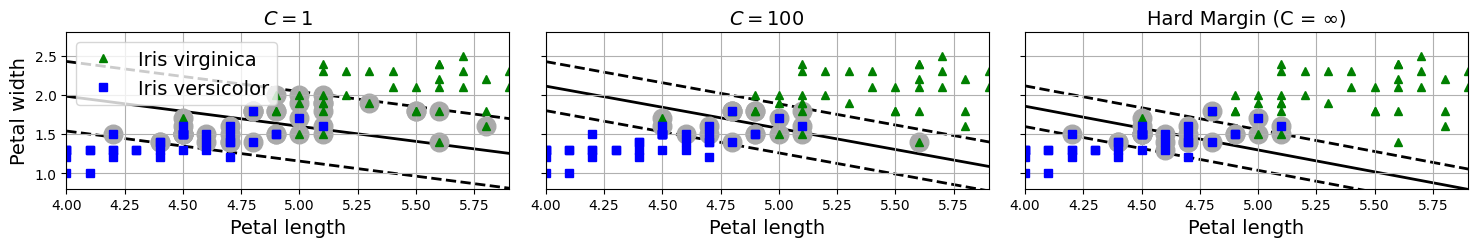

In [15]:
scaler = StandardScaler()

# ÏÜåÌîÑÌä∏ ÎßàÏßÑ SVM
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

#svm_clf3 = LinearSVC(C=float("Inf"), max_iter=10_000, dual=True, random_state=42)
svm_clf3 = LinearSVC(C=10**9, max_iter=10_000, dual=True, random_state=42)

# Ïä§ÏºÄÏùºÎßÅÎêú Î™®Îç∏Î°ú ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)
scaled_svm_clf3 = make_pipeline(scaler, svm_clf3)

# Î™®Îç∏ ÌïôÏäµ
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)
scaled_svm_clf3.fit(X, y)

# Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÌååÎùºÎØ∏ÌÑ∞Î°ú Î≥ÄÌôò
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
w3 = svm_clf3.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])

# ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Ï∞æÍ∏∞(LinearSVCÎäî Ïù¥ ÏûëÏóÖÏùÑ ÏûêÎèôÏúºÎ°ú ÏàòÌñâÌïòÏßÄ ÏïäÏùå)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X.dot(w3) + b3) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]
svm_clf3.support_vectors_ = X[support_vectors_idx3]

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
fig, axes = plt.subplots(ncols=3, figsize=(15, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[2])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf3, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"Hard Margin (C = ‚àû)")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot_with_hard_margin")
plt.show()

In [16]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [17]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

> SVM Î™®Îç∏ÏùÄ ÏÉòÌîåÍ≥º Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º Ï∏°Ï†ïÌï® (ÏñëÏàò ÎòêÎäî ÏùåÏàò) \
> - 0Ïù¥Î©¥ Í≤∞Ï†ïÍ≤ΩÍ≥Ñ \
> - ÏñëÏàòÏù¥Î©¥ Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïóê ÏÜçÌï®
> - ÏùåÏàòÏù¥Î©¥ Î∞òÎåÄÎ∞©Ìñ•(Îã§Î•∏ ÌÅ¥ÎûòÏä§)ÏùÑ ÏùòÎØ∏

LinearSVCÎäî ÌÅ¥ÎûòÏä§ ÌôïÎ•†ÏùÑ Ï∂îÏ†ïÌïòÎäî predict_proba()Î•º ÏßÄÏõêÌïòÏßÄ ÏïäÏùå
- Îπ†Î•∏ ÏÑ±Îä•Í≥º ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Ïóê Ï§ëÏ†ê. ÌôïÎ•† Ï∂îÏ†ïÏùÑ ÌïòÏßÄ ÏïäÏùå.

In [18]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X, y) #y = (iris.target == 2) # Iris-Virginica

probs = svm_clf.predict_proba(X_new)


In [19]:
probs

array([[0.03662846, 0.96337154],
       [0.58824688, 0.41175312]])

> ÌÅ¥ÎûòÏä§Ïóê ÏÜçÌï† ÌôïÎ•† \
> ÏÉòÌîå1 : 96.1% \
> ÏÉòÌîå2 : 39.5%

## 5.2 ÎπÑÏÑ†Ìòï SVM Î∂ÑÎ•ò

ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Î∂ÑÎ•òÌï† Ïàò ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Î£®Îäî Î∞©Î≤ï

Í∑∏Î¶º 5-5 ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂ÑÎêòÎäî Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞

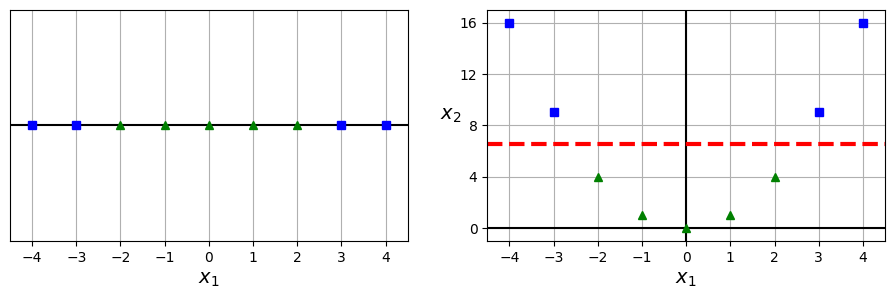

In [20]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-5Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$¬†¬†", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

Îã§Ìï≠ÌäπÏÑ± Ï∂îÍ∞Ä
- Îã§Ìï≠ ÌöåÍ∑ÄÏóêÏÑú Ï≤òÎüº Îã§Ìï≠ ÌäπÏÑ±ÏùÑ Ï∂îÍ∞Ä --> **Ï∞®ÏõêÏùÑ ÎäòÎ†§ÏÑú ÏÑ†ÌòïÏúºÎ°ú Î∂ÑÎ•ò**
- ÏôºÏ™Ω Í∑∏ÎûòÌîÑÎäî ÏÑ†ÌòïÎ∂ÑÎ•òÍ∞Ä Î∂àÍ∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞
- Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑÎäî ÎëêÎ≤àÏß∏ ÌäπÏÑ±ÏúºÎ°ú x <sub>2</sub> = (x<sub>1</sub>) <sup>2</sup> ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ 2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì¨

In [21]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C = 10, max_iter = 10_000, random_state = 42)
)

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

Í∑∏Î¶º 5-6 Îã§Ìï≠ ÌäπÏÑ±ÏùÑ ÏÇ¨Ïö©Ìïú ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞

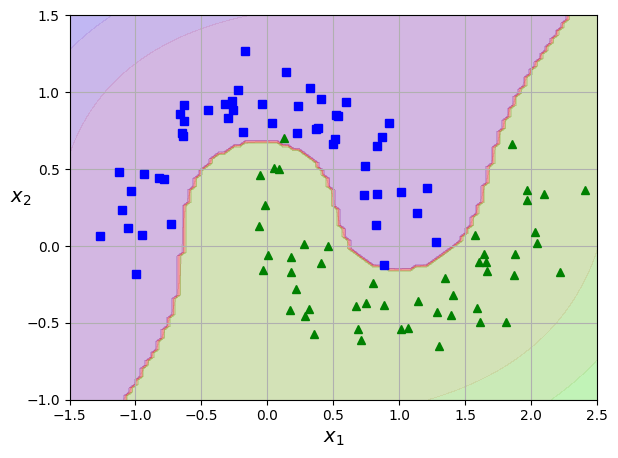

In [22]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-6ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

moons Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ÏÑú `PolynomialFeatures` Î≥ÄÌôòÍ∏∞ÏôÄ `LinearSVC` Ïó∞Í≤∞

### 5.2.1.Îã§Ìï≠Ïãù Ïª§ÎÑê

- Îã§Ìï≠ ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÎäî Í≤ÉÏùÄ Î™®Îç∏ÏùÑ ÎäêÎ¶¨Í≤å ÎßåÎì†Îã§
- **Ïª§ÎÑê Ìä∏Î¶≠**ÏùÄ ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÏßÄ ÏïäÍ≥†, Îß§Ïö∞ ÎÜíÏùÄ Ï∞®ÏàòÏùò Îã§Ìï≠ ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïú Í≤ÉÍ≥º Í∞ôÏùÄ Í≤∞Í≥ºÎ•º ÏñªÍ≤å Ìï¥Ï§å.

3Ï∞® Îã§Ìï≠Ïãù Ïª§ÎÑê
> kernel = "poly" : Îã§Ìï≠ÏãùÏª§ÎÑê \
> degree = 3 : 3Ï∞® Îã§Ìï≠Ïãù \
> coef0 : Î™®Îç∏Ïù¥ ÎÜíÏùÄ Ï∞®ÏàòÏôÄ ÎÇÆÏùÄ Ï∞®ÏàòÏóê ÏñºÎßàÎÇò ÏòÅÌñ•ÏùÑ Î∞õÏùÑÏßÄ Ï°∞Ï†à \
>> Îã§Ìï≠ÏãùÏª§ÎÑêÏù¥ ÎÇ¥Ï†ÅÏùÑ Ìï† Îïå Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ï°∞Ï†à \
>> coef0 = 0 : Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞Ïóê ÎßéÏùÄ ÏòÅÌñ•
>> coef0 > 0 : Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞ ÏòÅÌñ•ÏùÑ Ï§ÑÏù¥Í≥† Î∞©Ìñ•Ïù¥ÎÇò Í∞ÅÎèÑ Í∞ôÏùÄ Í¥ÄÍ≥ÑÎ•º Ï§ëÏöîÌïòÍ≤å |

> C : Í∑úÏ†ú ÌååÎùºÎØ∏ÌÑ∞

In [23]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Í∑∏Î¶º 5-7 Îã§Ìï≠Ïãù Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©Ìïú SVM Î∂ÑÎ•òÍ∏∞

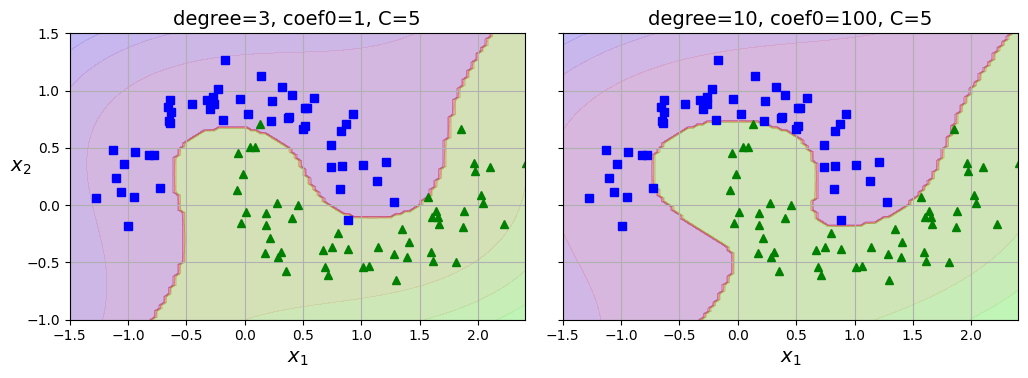

In [24]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-7ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

Îã§Ìï≠ Ïª§ÎÑê Î™®Îç∏Ïù¥ Í≥ºÎåÄ Ï†ÅÌï©Ïù¥Î©¥ Ï∞®ÏàòÎ•º Ï§ÑÏó¨Ïïº ÌïòÍ≥†, Í≥ºÏÜå Ï†ÅÌï©Ïù¥Î©¥ Ï∞®ÏàòÎ•º ÎäòÎ†§Ïïº ÌïúÎã§.

> PolynomialFeatures 3Ï∞®Ìï≠ ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïú Í∑∏Î¶ºÍ≥º Ïú†ÏÇ¨

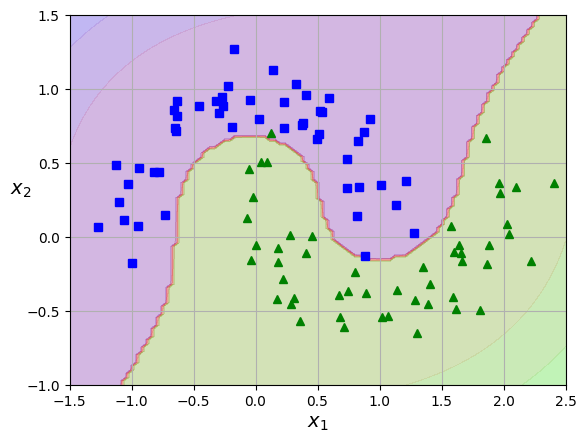

In [25]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

### 5.2.2. Ïú†ÏÇ¨ÎèÑ ÌäπÏÑ±

- ÎπÑÏÑ†ÌòïÌäπÏÑ±ÏùÑ Îã§Î£®Îäî Îòê Îã§Î•∏ Í∏∞Î≤ï \
- Í∞Å ÏÉòÌîåÏù¥ ÌäπÏ†ï Í∏∞Ï§Ä(ÎûúÎìúÎßàÌÅ¨)ÏôÄ ÏñºÎßàÎÇò Ïú†ÏÇ¨ÌïúÏßÄ Í≥ÑÏÇ∞Ìï¥ÏÑú ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏúºÎ°ú Ï∂îÍ∞Ä

> ÎûúÎìúÎßàÌÅ¨Îäî ÎûúÎç§ÌïòÍ≤å ÏÑ†ÌÉùÌïòÍ±∞ÎÇò Ï†ÑÎûµÏ†ÅÏúºÎ°ú ÏÑ†ÌÉù \
> ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò: ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏÉòÌîå Í∞ÑÏùò ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Îçî Ïûò Ìè¨Ï∞©Ìï®.\
> Í≥†Ï∞®Ïõê Î≥ÄÌôò: ÎûúÎìúÎßàÌÅ¨ÏôÄÏùò Ïú†ÏÇ¨ÎèÑÎ•º ÌäπÏÑ±ÏúºÎ°ú Î≥ÄÌôòÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Îäî Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏúºÎ°ú Î≥ÄÌôòÎêòÎ©∞, Ïù¥ Í≥µÍ∞ÑÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Î∂ÑÎ¶¨Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßê.\
> Ïª§ÎÑê Ìä∏Î¶≠Í≥º Ïú†ÏÇ¨: Ïª§ÎÑê Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥†ÎèÑ, ÎûúÎìúÎßàÌÅ¨ÏôÄ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ÏùÑ ÌÜµÌï¥ ÎπÑÏä∑Ìïú Ìö®Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùå

Í∞ÄÏö∞Ïä§ Î∞©ÏÇ¨ Í∏∞Ï†Ä Ìï®Ïàò(RBF)
- ÎûúÎìúÎßàÌÅ¨(m)ÏóêÏÑú Î©ÄÏñ¥ÏßÄÎ©¥ Í∞íÏù¥ Í∏âÍ≤©Ìûà ÏûëÏïÑÏßÄÍ≤å Ìï®
- Í∞êÎßàÎäî ÏñºÎßàÎÇò Îπ®Î¶¨ 0ÏúºÎ°ú ÏàòÎ†¥ÌïòÍ≤å Ìï†ÏßÄ Í≤∞Ï†ï. Í∞íÏù¥ ÌÅ¨Î©¥ mÏóêÏÑú Î©ÄÏñ¥ÏßàÏàòÎ°ù Í∏âÍ≤©Ìûà 0ÏúºÎ°ú ÏàòÎ†¥ -> Ï¢ÖÎ™®ÏñëÏù¥ Ï¢ÅÏïÑÏßÄÍ≤å Îê®

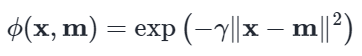

Í∑∏Î¶º 5-8. Í∞ÄÏö∞Ïä§ RFÎ•º ÏÇ¨Ïö©Ìïú Ïú†ÏÇ¨ÎèÑ ÌäπÏÑ±

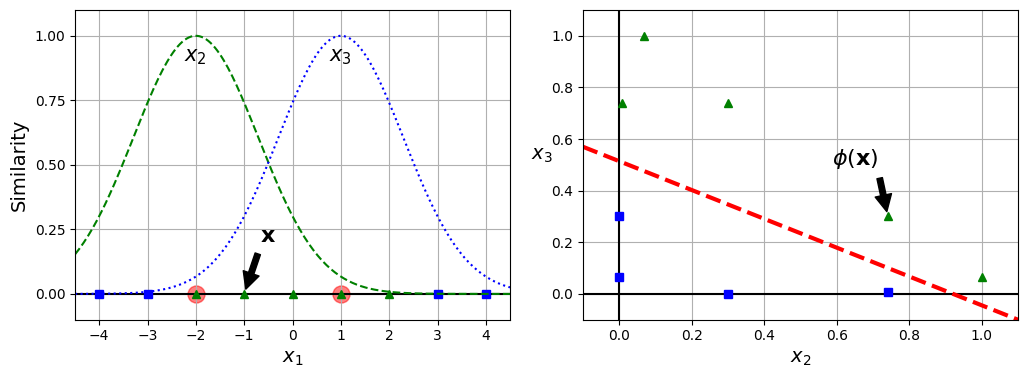

In [26]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-8ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$¬†¬†", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

- ÎëêÍ∞úÏùò ÎûúÎìúÎßàÌÅ¨ -2, 1ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú x=-1 ÏÉòÌîåÏùò Ïú†ÏÇ¨ÎèÑÎ•º ÌôïÏù∏ÌïòÎäî Í∑∏ÎûòÌîÑ
- x2, x3Î°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏÑ†Ìòï Î∂ÑÎ•òÍ∞Ä Í∞ÄÎä•Ìï¥Ïßê

- ÎûúÎìúÎßàÌÅ¨Î•º Ïñ¥ÎñªÍ≤å ÏÑ§Ï†ïÌï†Íπå?
- Î™®Îì† ÏÉòÌîå ÏúÑÏπòÏóê ÎûúÎìúÎßàÌÅ¨Î•º ÏÑ§Ï†ïÌïòÎ©¥ Ï∞®ÏõêÏù¥ Îß§Ïö∞ Ïª§Ï†∏ ÏÑ†Ìòï Î∂ÑÎ•ò Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßê
-> ÌäπÏÑ±Ïù¥ Îß§Ïö∞ ÎäòÏñ¥ÎÇ® (Î≥µÏû°ÎèÑ ÎÜíÏïÑÏßê, Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±)

In [27]:
import pandas as pd
df_gaussian_rbf = pd.DataFrame({
    "x1": X1D.flatten(),
    "x2 (m: -2)": gaussian_rbf(X1D, -2, gamma),
    "x3 (m: 1)": gaussian_rbf(X1D, 1, gamma)
})

print(df_gaussian_rbf)

    x1  x2 (m: -2)  x3 (m: 1)
0 -4.0    0.301194   0.000553
1 -3.0    0.740818   0.008230
2 -2.0    1.000000   0.067206
3 -1.0    0.740818   0.301194
4  0.0    0.301194   0.740818
5  1.0    0.067206   1.000000
6  2.0    0.008230   0.740818
7  3.0    0.000553   0.301194
8  4.0    0.000020   0.067206


In [28]:
import numpy as np
import pandas as pd

# ÏûÑÏãú Îç∞Ïù¥ÌÑ∞
test_X1D = np.array([[-4], [-3], [-1], [0], [2], [3], [4]])

# Î™®Îì† ÏÉòÌîåÏùÑ ÎûúÎìúÎßàÌÅ¨Î°ú ÏÑ§Ï†ïÌïòÏó¨ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
test_XK = np.zeros((test_X1D.shape[0], test_X1D.shape[0]))
for i in range(test_X1D.shape[0]):
    test_XK[:, i] = gaussian_rbf(test_X1D, test_X1D[i], gamma)

# Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ÏùÑ DataFrameÏúºÎ°ú Î≥ÄÌôò
test_df_XK = pd.DataFrame(test_XK, columns=[f"Landmark {i+1}" for i in range(test_X1D.shape[0])])

# Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ Ï∂úÎ†•
print(test_df_XK)


     Landmark 1    Landmark 2  Landmark 3  Landmark 4  Landmark 5  \
0  1.000000e+00  7.408182e-01    0.067206    0.008230    0.000020   
1  7.408182e-01  1.000000e+00    0.301194    0.067206    0.000553   
2  6.720551e-02  3.011942e-01    1.000000    0.740818    0.067206   
3  8.229747e-03  6.720551e-02    0.740818    1.000000    0.301194   
4  2.039950e-05  5.530844e-04    0.067206    0.301194    1.000000   
5  4.129249e-07  2.039950e-05    0.008230    0.067206    0.740818   
6  4.587182e-09  4.129249e-07    0.000553    0.008230    0.301194   

     Landmark 6    Landmark 7  
0  4.129249e-07  4.587182e-09  
1  2.039950e-05  4.129249e-07  
2  8.229747e-03  5.530844e-04  
3  6.720551e-02  8.229747e-03  
4  7.408182e-01  3.011942e-01  
5  1.000000e+00  7.408182e-01  
6  7.408182e-01  1.000000e+00  


> NÍ∞úÏùò ÏÉòÌîåÏù¥Î©¥ NÏùò ÌäπÏÑ±Ïù¥ ÏÉùÍ∏∞Í≥†, N<sup>2</sup> Ïùò Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞Ïù¥ ÌïÑÏöîÌï®

### 5.2.3 Í∞ÄÏö∞Ïä§ RBF Ïª§ÎÑê

- Ïú†ÏÇ¨ÎèÑ ÌäπÏÑ± Î∞©ÏãùÏùÄ Ï∂îÍ∞Ä ÌäπÏÑ±ÏùÑ Î™®Îëê Í≥ÑÏÇ∞ÌïòÎ†§Î©¥ Ïó∞ÏÇ∞ ÎπÑÏö©Ïù¥ ÎßéÏù¥ ÌïÑÏöîÌï®
-- ÌäπÌûà Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Í∞Ä ÌÅ¨Î©¥ Îçî ÎßéÏù¥ ÌïÑÏöîÌïòÍ≤å Îê®
- Ïª§ÎÑê Ìä∏Î¶≠????? ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú ÎπÑÏä∑Ìïú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùå. -> Í∞ÄÏö∞Ïä§ RBF Ïª§ÎÑê


In [29]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

Í∑∏Î¶º 5-9. RBF Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©Ìïú SVM Î∂ÑÎ•òÍ∏∞

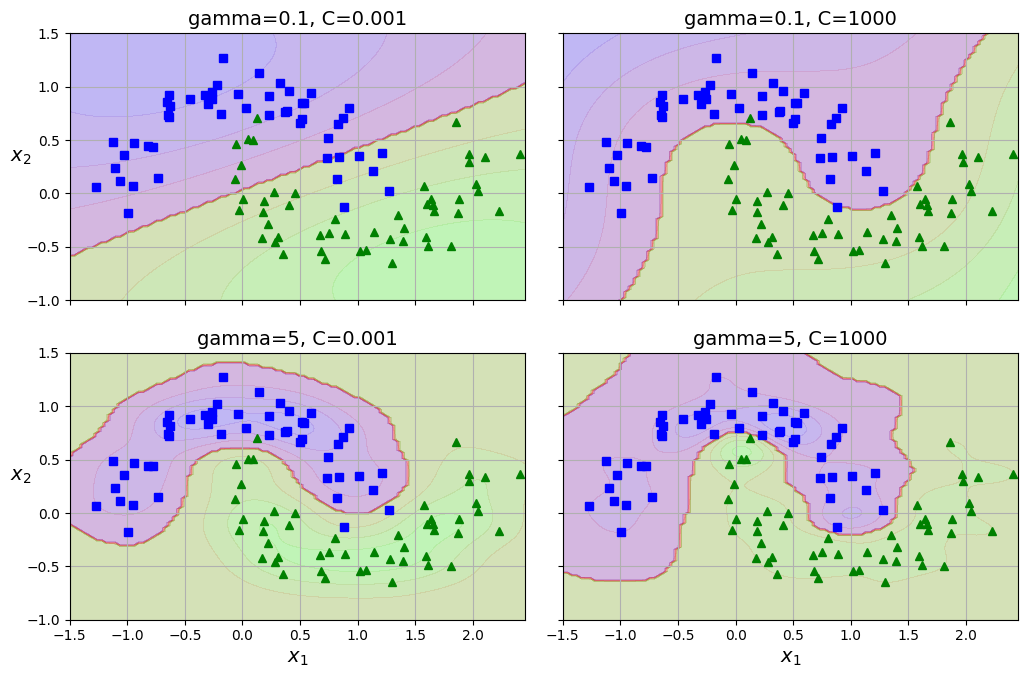

In [30]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-9Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

- Í∞êÎßà Ï¶ùÍ∞Ä ÏãúÌÇ§Î©¥ -> Ï¢ÖÎ™®Ïñë Ï¢ÅÏïÑÏßê -> Í∞Å ÏÉòÌîåÏùò ÏòÅÌñ• Î≤îÏúÑÍ∞Ä ÏûëÏïÑÏßê -> Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä Î∂àÍ∑úÏπôÌï¥ÏßÄÎ©¥ÏÑú Í∞Å ÏÉòÌîåÏùÑ Îî∞Îùº Íµ¨Î∂àÍµ¨Î∂à ÌúòÏñ¥Ïßê
- Í∞êÏûêÍ∞Ä ÏûëÏúºÎ©¥ -> Ï¢ÖÎ™®Ïñë ÎÑìÏñ¥Ïßê -> ÏÉòÌîå ÎÑìÏùÄ Î≤îÏúÑÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎØÄÎ°ú Í≤∞Ï°ç Í≤ΩÍ≥ÑÍ∞Ä Î∂ÄÎìúÎü¨ÏõåÏßê

-> Í≥ºÎåÄÏ†ÅÌï©Ïù¥Î©¥ Í∞êÎßàÎ•º Í∞êÏÜå ÏãúÌÇ§Í≥†, Í≥ºÏÜåÏ†ÅÌï©Ïù¥Î©¥ Ï¶ùÍ∞ÄÏãúÏºúÏïº Ìï®

- Ïù¥Ïô∏Ïóê Îã§Î•∏ Ïª§ÎÑêÎì§ÏùÄ Í±∞Ïùò ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÏùå
- Î¨∏ÏûêÏó¥Ïª§ÎÑê(string kernerl)Ïù¥ Í∞ÄÎÅî ÌÖçÏä§Ìä∏ Î¨∏ÏÑúÎÇò DNA ÏÑúÏó¥ Î∂ÑÎ•ò Îïå ÏÇ¨Ïö©Îê®

- ÏÑ†Ìòï Ïª§ÎÑêÏùÑ Î®ºÏ†Ä ÏãúÎèÑÌï† Í≤É (LinearSVCÍ∞Ä SVC(kernel='linear')Î≥¥Îã§ Îπ†Î¶Ñ
- ÌõàÎ†®ÏÑ∏Ìä∏Í∞Ä ÎÑàÎ¨¥ ÌÅ¨ÏßÄ ÏïäÎã§Î©¥ Í∞ÄÏö∞Ïä§ RBF Ïª§ÎÑêÎèÑ ÏãúÎèÑÌïòÎ©¥ Ï¢ãÏùå
- Î¶¨ÏÜåÏä§Í∞Ä ÎêòÎ©¥ ÍµêÏ∞® Í≤ÄÏ¶ùÍ≥º ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏúºÎ°ú Ï¢ãÏùÄ Ïª§ÎÑê ÌÖåÏä§Ìä∏

### 5.2.4. Í≥ÑÏÇ∞ Î≥µÏû°ÎèÑ

LinearSVC
- liblinear ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö© (ÏÑ†Ìòï SVMÏùÑ ÏúÑÌïú ÏµúÏ†ÅÌôîÎêú ÏïåÍ≥†Î¶¨Ï¶ò)
-- Ïª§ÎÑê Ìä∏Î¶≠ ÏßÄÏõê ÏïàÌï®
-- ÌõàÎ†® ÏÉòÌîåÍ≥º ÌäπÏÑ±ÏàòÏóê ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÎäòÏñ¥ÎÇ®. -> O(mxn) // m: ÏÉòÌîåÏàò, n : ÌäπÏÑ±Ïàò

SVC
- libsvm ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö© (Ïª§ÎÑê Ìä∏Î¶≠ ÏïåÍ≥†Î¶¨Ï¶ò)
-- O(m <sup>2</sup> x n) ÎòêÎäî O(m <sup>3</sup> x n) : ÏÉòÌîåÏàòÍ∞Ä ÎßéÏïÑÏßà ÏàòÎ°ù ÎäêÎ†§Ïßê
-- Ïª§ÎÑê Í≥ÑÏÇ∞Ïóê ÏùòÌï®. + ÏÉòÌîåÍ∞Ñ Í±∞Î¶¨ Í≥ÑÏÇ∞

SGDClassifier
- O(mxn)

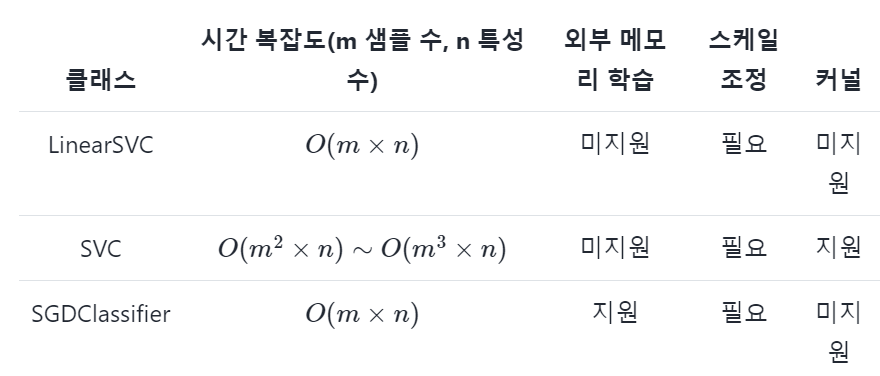

## 5.3 SVM ÌöåÍ∑Ä

SVMÏùÑ ÌöåÍ∑ÄÏóêÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•

- Î™©Ìëú : ÏßÄÏ†ïÎêú ÎèÑÎ°ú ÏïàÏóê ÎßéÏùÄ ÏÉòÌîåÏù¥ Îì§Ïñ¥Ïò§Î°ù Ìï®
- ÎßàÏßÑÏò§Î•ò : ÎèÑÎ°ú Î∞ñÏùò ÏÉòÌîå
- ÎèÑÎ°úÌè≠ : ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ œµ

In [31]:
from sklearn.svm import LinearSVR

# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÑ∏ Ï§ÑÏùÄ Í∞ÑÎã®Ìïú ÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

Í∑∏Î¶º 5-10. SVM ÌöåÍ∑Ä

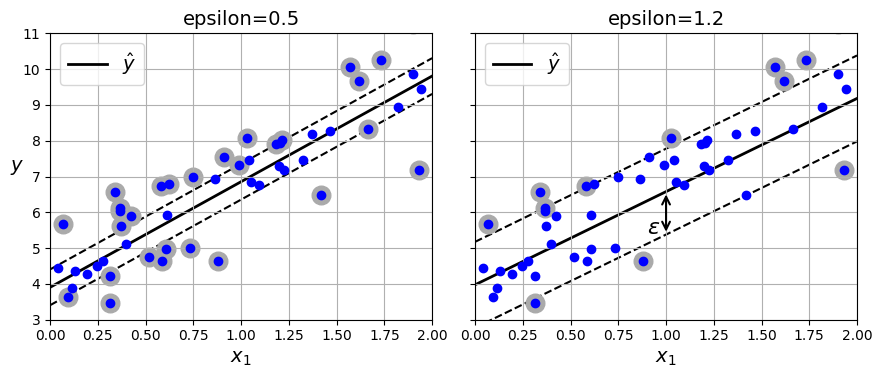

In [32]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-10ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()

- œµÏù¥ ÏûëÏúºÎ©¥ ÎèÑÎ°úÌè≠ ÏûëÏïÑÏßê : ÏÑúÌè¨Ìä∏Î≤°ÌÑ∞(ÎßàÏßÑ Î∞ñÏóê ÏúÑÏπòÌïú ÏÉòÌîå)Í∞Ä ÎäòÏñ¥ÎÇòÏÑú Î™®Îç∏ Í∑úÏ†ú

> - ÎßàÏßÑ ÏïàÏùò Îç∞Ïù¥ÌÑ∞: ÏòàÏ∏°Ïù¥ Ï∂©Î∂ÑÌûà Ï†ïÌôïÌïòÎØÄÎ°ú, Î™®Îç∏Ïù¥ Í∑∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌïôÏäµÌïòÍ±∞ÎÇò ÏòàÏ∏°ÏùÑ ÏàòÏ†ïÌïòÏßÄ ÏïäÏäµÎãàÎã§. Ï¶â, ÎßàÏßÑ ÏïàÏóê Ï∂îÍ∞ÄÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Î•º Îçî ÎÑ£Ïñ¥ÎèÑ Î™®Îç∏Ïù¥ Î≥ÄÌôîÌïòÏßÄ ÏïäÎäîÎã§Îäî ÏùòÎØ∏\
> - ÎßàÏßÑ Î∞ñÏùò Îç∞Ïù¥ÌÑ∞: ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÌÅ∞ Îç∞Ïù¥ÌÑ∞Î°ú, Î™®Îç∏Ïù¥ ÌïôÏäµÌïòÍ≥† ÏòàÏ∏°ÏùÑ Ï°∞Ï†ïÌïòÎäî Îç∞ Ï§ëÏöîÌïú Ïó≠Ìï†

ÎπÑÏÑ†Ìòï ÌöåÍ∑Ä

In [33]:
from sklearn.svm import SVR

# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÑ∏ Ï§ÑÏùÄ Í∞ÑÎã®Ìïú 2Ï∞®Î∞©Ï†ïÏãù Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

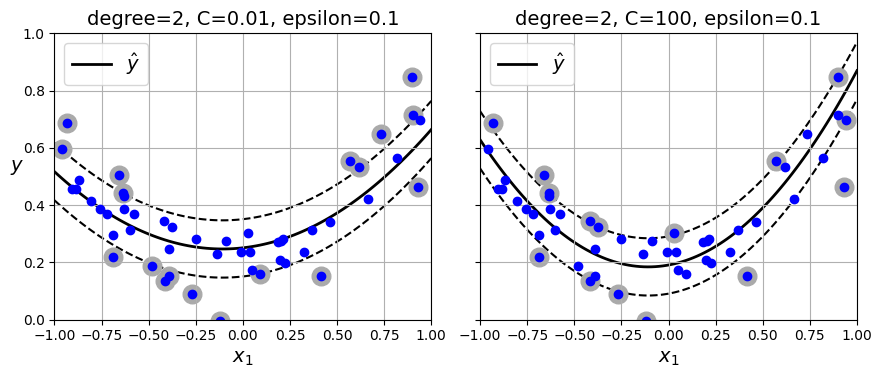

In [34]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-11ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

## 5.4 SVM Ïù¥Î°†

- ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞ Î™®Îç∏ÏùÄ Í≤∞Ï†ïÌï®ÏàòÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú ÏÉàÎ°úÏö¥ ÏÉòÌîå XÏùò ÌÅ¥ÎûòÏä§Î•º ÏòàÏ∏°
- Í≤∞Í≥ºÍ∞Ä 0Î≥¥Îã§ ÌÅ¨Î©¥ ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§, 0Î≥¥Îã§ ÏûëÏúºÎ©¥ ÏùåÏÑ± ÌÅ¥ÎûòÏä§
- Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎäî Í≤∞Ï†ïÌï®ÏàòÏùò Í∞íÏù¥ 0Ïù∏ ÏÑ†
- ÎßàÏßÑÏùò Í∞ÄÏû•ÏûêÎ¶¨Îäî Í≤∞Ï†ïÌï®ÏàòÏùò Í∞íÏù¥ +1, -1Ïù∏ ÏÑ†

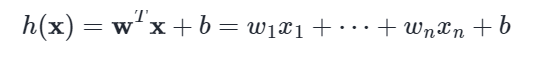

Í≤∞Ï†ïÌï®ÏàòÏùò Í∏∞Ïö∏Í∏∞Î°ú wÏôÄ ÎßàÏßÑ ÌÅ¨Í∏∞ ÌôïÏù∏
- ÏôºÏ™Ω Í∑∏ÎûòÌîÑ Í∞ÄÏ§ëÏπò = 1
-- ÎßàÏßÑÏùò Í≤ΩÍ≥ÑÎ•º +1, -1Ïù¥ÎùºÍ≥† Ï†ïÏùòÌï¥Î≥¥Í≥†,
-- w<sub>1</sub>x<sub>1</sub> = -1 ÎòêÎäî +1 : x<sub>1</sub> = -1, +1
-- ÎßàÏßÑÏùò ÌÅ¨Í∏∞Îäî 2

- Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ Í∞ÄÏ§ëÏπò = 0.5
-- w<sub>1</sub>x<sub>1</sub> = -1 ÎòêÎäî +1 : x<sub>1</sub> = -2, +2
-- ÎßàÏßÑÏùò ÌÅ¨Í∏∞Îäî 4

bÎäî ÎßàÏßÑÏùò ÌÅ¨Í∏∞Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú ÏùºÎã® Î¨¥Ïãú

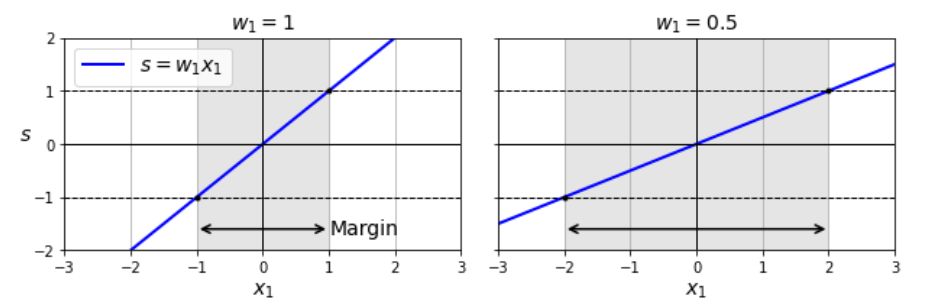

### ÌïòÎìú ÎßàÏßÑ ÏÑ†ÌòïSVM Î∂ÑÎ•òÍ∏∞Ïùò Î™©Ï†ÅÌï®ÏàòÏôÄ Ï†úÏïΩÏ°∞Í±¥

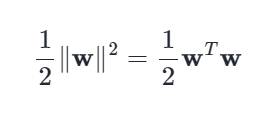


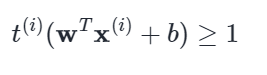

t<sup>(i)</sup>
- iÎ≤àÏß∏ ÏÉòÌîåÏùò ÌÅ¥ÎûòÏä§(ÏñëÏÑ±/ÏùåÏÑ±)Î•º Í∞ÄÎ¶¨ÌÇ®Îã§
- ÏñëÏÑ±Ïù¥Î©¥ +1, ÏùåÏÑ±Ïù¥Î©¥ -1
- Í≤∞Íµ≠ ÏúÑ Ï†úÏïΩÏÇ¨Ìï≠ÏùÄ ÏïÑÎûò Í∑∏ÎûòÌîÑÏùò ÌååÎûÄÎ∂ÄÎ∂ÑÍ≥º ÎÖ∏ÎûÄÎ∂ÄÎ∂Ñ

> Ïó¨Í∏∞ÏÑú >= 1 Ïù∏ Ïù¥Ïú†Îäî ÎßàÏßÑÏùÑ Ï†ÅÏñ¥ÎèÑ 1Î≥¥Îã§Îäî ÌÅ¨Í≤å ÌïòÍ≤†Îã§Îäî ÏùòÎØ∏

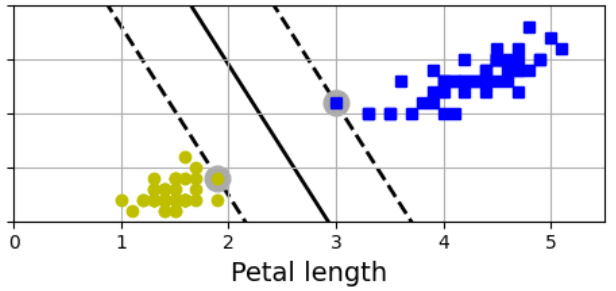

Î™©Ï†ÅÌï®ÏàòÍ∞Ä Í∞ëÏûêÍ∏∞ Ïôú Ï†ÄÎ†áÍ≤å ÎÇòÏôîÎäîÏßÄ Ïù¥Ìï¥Í∞Ä ÏïàÎêòÏÑú Ïú†ÎèÑÎ•º Ïû†Íπê Ìï¥Î≥¥Î©¥... (Ï∂úÏ≤ò: https://skyil.tistory.com/150)

X<sub>+</sub> = X<sub>-</sub> + ŒªW : plus planeÏóêÏÑú minus planeÏùÄ ÌèâÌñâÏù¥Îèô

W<sup>T</sup>X<sup>+</sup> + b = 1 : plus plane

W<sup>T</sup>X<sup>+</sup> + b = -1 : minus plane

ÏúÑ Í¥ÄÍ≥ÑÎ•º Í∏∞Î∞òÏúºÎ°ú

W<sup>T</sup>(X<sup>-</sup>+ ŒªW) + b = 1

W<sup>T</sup>X<sup>-</sup> + b + ŒªW<sup>T</sup>W = 1

-1 + ŒªW<sup>T</sup>W = 1

Œª = 2 / W<sup>T</sup>W

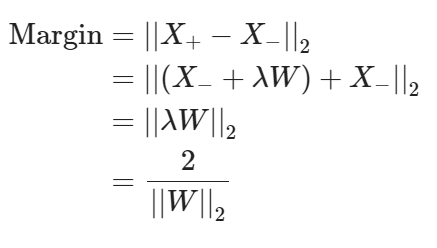

SVMÏùÄ ÎßàÏßÑÏùÑ ÏµúÎåÄÌïòÎäî Í≤ÉÏù¥ Î™©Ï†ÅÏù∏Îç∞.. Ïó≠ÏàòÎ•º Ï∑®ÌïòÎ©¥ ÏïÑÎûò ÏãùÏ≤òÎüº ÏµúÏÜåÌôîÌïòÎäî Í≤ÉÏù¥ Î™©Ï†ÅÏù∏Í≤ÉÍ≥º Í∞ôÎã§. Í≥ÑÏÇ∞ Ïö©Ïù¥Î•º ÏúÑÌï¥ Ï†úÍ≥±ÏùÑ ÌïúÎ≤à Ìï®

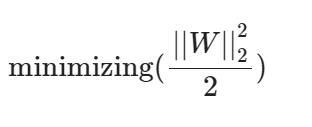

Quadratic Programming(QP)
- Î™©Ï†ÅÏãùÏù¥ 2Ï∞®Î∞©Ï†ïÏãùÏù¥Í≥†, Ï†úÏïΩÏãùÏù¥ ÏÑ†ÌòïÏù∏ Î¨∏Ï†úÎ•º QPÎùºÍ≥† Ìï®
- QPÎäî Convex optimizationÏûÑ..
- Convex optimizationÏùÄ ÏµúÎåÄÍ∞íÏù¥ÎÇò ÏµúÏÜåÍ∞í 1Í∞úÍ∞Ä Ï°¥Ïû¨
- QPÎäî Ìë∏Îäî Î∞©Î≤ïÏù¥ Ïù¥ÎØ∏ Ï°¥Ïû¨. Ïòà) ÎùºÍ∑∏ÎûëÏßÄ ÏäπÏàò

### ÏÜåÌîÑÌä∏ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞ Î™©Ï†Å Ìï®ÏàòÏôÄ Ï†úÏïΩÏÇ¨Ìï≠

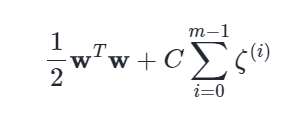

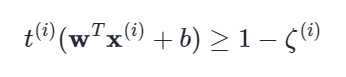

Œ∂<sup>(i)</sup> : Ïä¨ÎûôÎ≥ÄÏàò, iÎ≤àÏß∏ ÏÉòÌîåÏù¥ ÏñºÎßàÎÇò ÎßàÏßÑÏùÑ ÏúÑÎ∞òÌï†ÏßÄ Ï†ïÌï®

Îëê Ìï≠Ïùò ÏÉÅÏ∂©Îêú Î™©Ìëú

### SVM ÌõàÎ†®1

ÌûåÏßÄ ÏÜêÏã§ (hinge loss) / Ï†úÍ≥± ÌûåÏßÄ ÏÜêÏã§ (squred hinge loss)

Í∑∏Î¶º 5-13. ÌûåÏßÄ ÏÜêÏã§(ÏôºÏ™Ω)Í≥º Ï†úÍ≥± ÌûåÏßÄ ÏÜêÏã§(Ïò§Î•∏Ï™Ω)

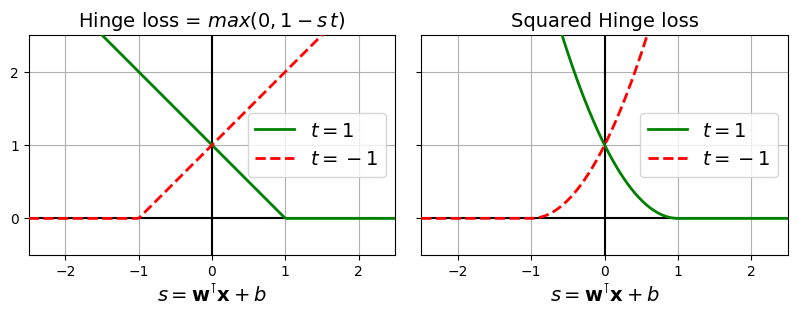

In [ ]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 5-13ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

save_fig("hinge_plot")
plt.show()

- ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÏÉòÌîå (t = 1)
-- sÍ∞Ä 1Î≥¥Îã§ ÌÅ¨Î©¥ ÏÜêÏã§ 0

- ÏùåÏÑ± ÌÅ¥ÎûòÏä§ ÏÉòÌîå (t = -1)
-- sÍ∞Ä -1Î≥¥Îã§ ÏûëÏúºÎ©¥ ÏÜêÏã§ 0

- Ï†úÍ≥± ÌûåÏßÄ ÏÜêÏã§Ïù¥ Ïù¥ÏÉÅÏπòÏóê Îçî ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌïòÏßÄÎßå, Ïù¥ÏÉÅÏπòÍ∞Ä ÏóÜÏúºÎ©¥ Îçî Îπ®Î¶¨ ÏàòÎ†¥Ìï®.
- LinearSVCÎäî Ï†úÍ≥±ÌûåÏßÄ ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©, SGDClassifierÎäî ÌûåÏßÄ ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©

> ÌûåÏßÄÏÜêÏã§ÏùÄ ÎßàÏßÑ ÏúÑÎ∞òÏù¥ Î∞úÏÉùÌïòÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûòÎ™ª Î∂ÑÎ•òÎêú Í≤ΩÏö∞ ÏÜêÏã§ÏùÑ Î∂ÄÍ≥ºÌïòÎäî Ìï®Ïàò \
> ÏÉòÌîåÏù¥ ÎßàÏßÑ Ïô∏Î∂ÄÏóê ÏûàÏùÑ ÎïåÎäî ÏÜêÏã§Ïù¥ 0Ïù¥ÏßÄÎßå, ÎßàÏßÑ ÎÇ¥Î∂ÄÏóê ÏûàÍ±∞ÎÇò ÏûòÎ™ª Î∂ÑÎ•òÎêú Í≤ΩÏö∞ÏóêÎäî ÏÜêÏã§Ïù¥ Î∞úÏÉù \
> SVMÏùÄ ÌûåÏßÄ ÏÜêÏã§ÏùÑ ÏµúÏÜåÌôîÌïòÏó¨ ÏµúÏ†ÅÏùò Î∂ÑÎ•òÍ∏∞Î•º ÌïôÏäµ

## 5.5. ÏåçÎåÄ Î¨∏Ï†ú

### SVM ÌõàÎ†®2 - ÏåçÎåÄÎ¨∏Ï†ú

>  SVMÏóêÏÑú Ï£ºÏñ¥ÏßÑ **ÏõêÎûòÏùò ÏµúÏ†ÅÌôî Î¨∏Ï†ú(Primal Problem)**Î•º Î≥ÄÌòïÌïòÏó¨ ÏåçÎåÄ Î¨∏Ï†úÎ°ú Î∞îÍæ∏Î©¥, Îçî Ìö®Ïú®Ï†ÅÏù¥Í±∞ÎÇò Ìï¥Í≤∞ÌïòÍ∏∞ Ïâ¨Ïö¥ Î∞©ÏãùÏúºÎ°ú SVMÏùÑ ÌõàÎ†®Ìï† Ïàò ÏûàÏùå

Î™©Ï†ÅÌï®ÏàòÏôÄ Ï†úÏïΩÏÇ¨Ìï≠ÏùÑ Primal ProblemÏù¥ÎùºÍ≥† ÌïòÎ©¥, ÎùºÍ∑∏ÎûëÏßÄ ÏäπÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ï†úÏïΩÏÇ¨Ìï≠ ÏóÜÎäî ÏµúÏ†ÅÌôî Î¨∏Ï†úÎ°ú Î≥ÄÌôò

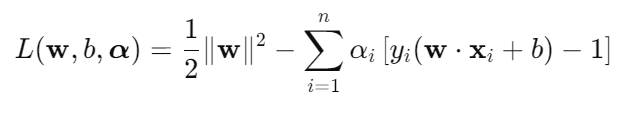

Œ±Îäî ÎùºÍ∑∏ÎûëÏßÄÏäπÏàò(Ï†úÏïΩÏ°∞Í±¥Ïóê Ìè¨Ìï®)

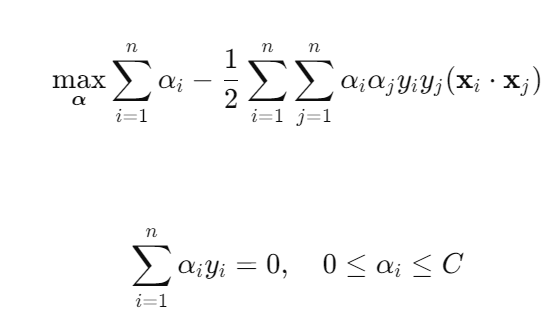

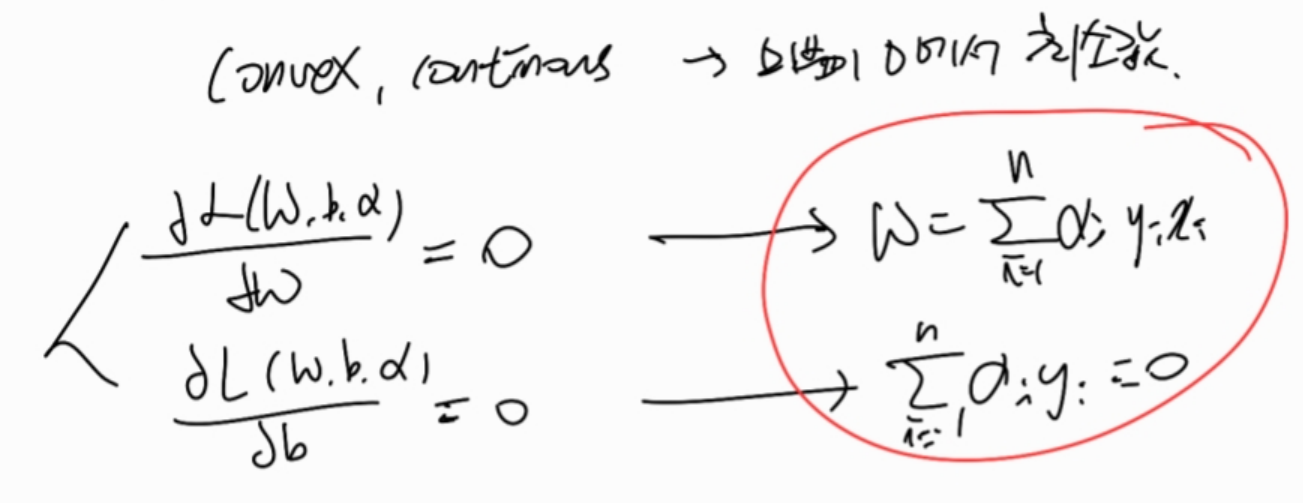

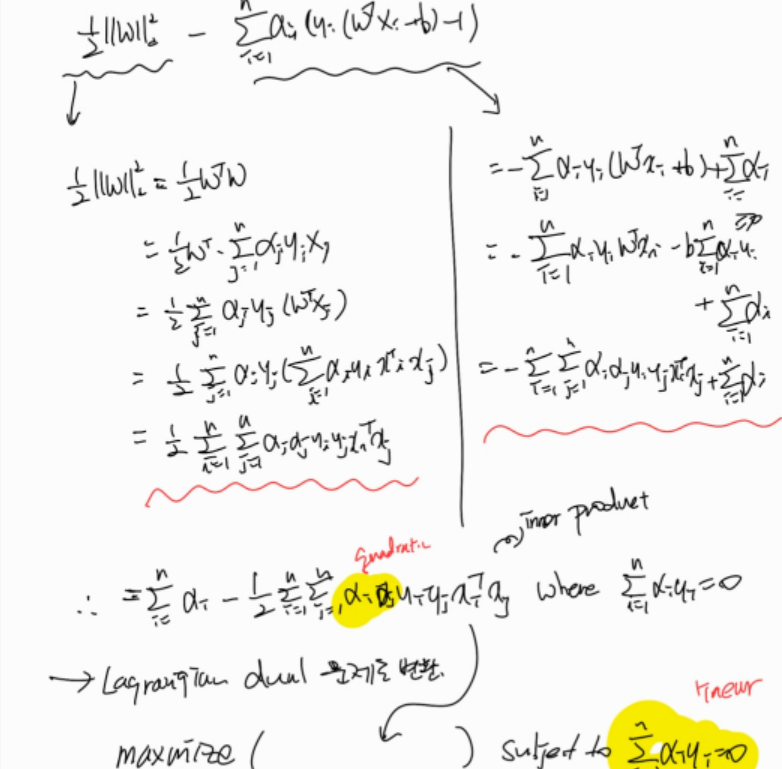

Ïù¥Î•º Ïù¥Ïö©Ìï¥ÏÑú WÏôÄ bÎ•º Íµ¨ÌïúÎã§

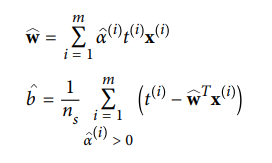

## 5.5.1 Ïª§ÎÑê SVM

> Primal ProblemÏóêÏÑú ùë§Îäî ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞xÏôÄ ÏßÅÏ†ëÏ†ÅÏù∏ Í¥ÄÍ≥ÑÎ•º Îß∫Í≥† ÏûàÏùå\
> Ï¶â, Í≤∞Ï†ï Í≤ΩÍ≥ÑÎäî ÏûÖÎ†• Í≥µÍ∞ÑÏóêÏÑú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÑ†Ìòï Í≤∞Ï†ïÏùÑ Ï†ïÏùò. \
> Ïù¥ Î∞©ÏãùÏùÄ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Î∂ÑÎ¶¨ Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ïûò ÏûëÎèôÌïòÏßÄÎßå, ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ï†úÎåÄÎ°ú Îêú Î∂ÑÎ•òÍ∞Ä Î∂àÍ∞ÄÎä•

> Dual ProblemÏúºÎ°ú Î≥ÄÌôòÌïòÎ©¥, ÏµúÏ†ÅÌôîÎäî Îçî Ïù¥ÏÉÅ **
ùë§ÏôÄ ùëèÎ•º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Îã§Î£®ÏßÄ ÏïäÍ≥†, **ÎùºÍ∑∏ÎûëÏ£º ÏäπÏàò ùõºÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Í∞ÑÏùò ÎÇ¥Ï†ÅÏúºÎ°ú Î¨∏Ï†úÎ•º Ìï¥Í≤∞ -> ÎÇ¥Ï†ÅÏùÑ Ïª§ÎÑêÌï®ÏàòÎ°ú Î≥ÄÌôò

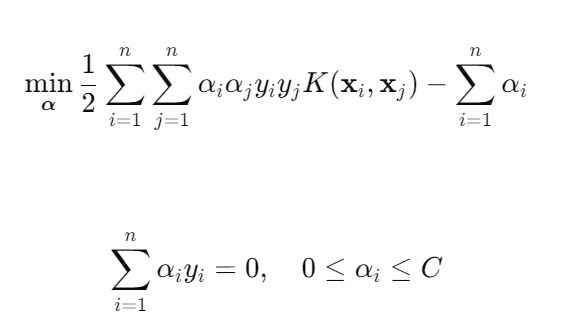

2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏÖãÏóê 2Ï∞® Îã§Ìï≠Ïãù Î≥ÄÌôòÏùÑ Ï†ÅÏö©ÌïòÍ≥† ÌõàÎ†® ÏãúÌÇ®Îã§Í≥† ÏÉùÍ∞ÅÌï¥Î≥¥Ïûê

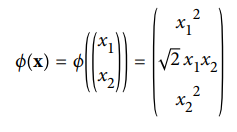

2Ï∞®Ïõê Î≤°ÌÑ∞ a, bÏóê Îã§Ìï≠Ïãù Îß§ÌïëÏùÑ Ï†ÅÏö©ÌïòÎ©¥ ÏõêÎûò Î≤°ÌÑ∞Ïùò dot productÏùò Ï†úÍ≥±Ïù¥Îê®

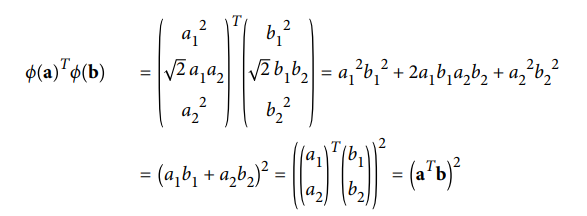

image.png

Í≤∞Íµ≠ Î≥ÄÌôòÏùÑ Î™∞ÎùºÎèÑ (ÏÉòÌîåÏùÑ Î≥ÄÌôòÌïòÏßÄ ÏïäÏïÑÎèÑ) ÎêúÎã§...dot product Î∂ÄÎ∂ÑÏùÑ Ï†úÍ≥±ÏúºÎ°úÎßå Î∞îÍæ∏Î©¥ ÎêúÎã§.

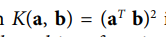

- 2Ï∞® Îã§Ìï≠Ïãù Ïª§ÎÑê
- Î≥ÄÌôòÏùÑ Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÍ≥†, (Î≥ÄÌôòÏãù ÏûêÏ≤¥Î•º Î™®Î•¥ÎçîÎùºÎèÑ) ,a,bÏóê Í∏∞Î∞òÌïòÏó¨ dot product Í≥ÑÏÇ∞Ïù¥ Í∞ÄÎä•Ìïú Ìï®Ïàò : Ïª§ÎÑê

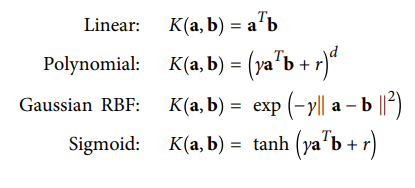

wÏùò Ï∞®ÏõêÏù¥ Îß§Ïö∞ ÌÅ¨ÏÑú Í≥ÑÏÇ∞ÏùÑ Î™ªÌï† Îïå wÎ•º Î™®Î•∏ Ï±Ñ ÏòàÏ∏°Ìï† Ïàò ÏûàÏùÑÍ∞Ä?

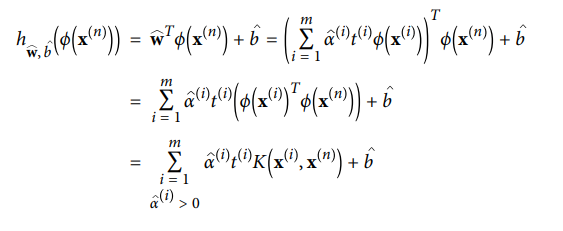

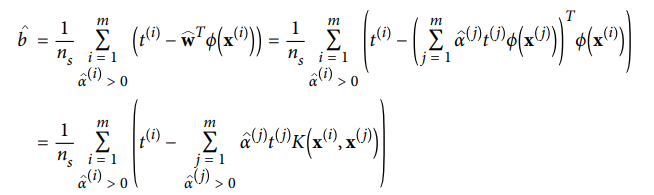